# Data Cleaning

In [1]:
#load in libraries and dataset
import pandas as pd
import numpy as np
pd.options.display.max_columns = 99

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv("imports-85.data", names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
#replace missing values with NaN
cars.replace("?", np.nan, inplace=True)

In [3]:
#subset numeric columns for training our model
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols].copy()
numeric_cars = numeric_cars.astype(float)

In [4]:
#count number of NaNs in normalized-losses column
numeric_cars['normalized-losses'].isna().sum()

41

In [5]:
#replace NaN normalized losses with the mean value of the column
numeric_cars['normalized-losses'] = numeric_cars['normalized-losses'].fillna(numeric_cars["normalized-losses"].mean())
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [6]:
#count number of remaining NaN values in other columns
numeric_cars.isna().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 4
stroke               4
compression-rate     0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [7]:
#since we want to predict price, drop all rows with price=NaN
numeric_cars = numeric_cars.dropna(subset=["price"])
numeric_cars.isna().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 4
stroke               4
compression-rate     0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [8]:
#replace remaining NaN values with the column mean
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isna().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
#normalize all columns besides price to a range of 0 to 1
price_col = numeric_cars["price"]
numeric_cars = (numeric_cars-numeric_cars.min())/(numeric_cars.max()-numeric_cars.min())
numeric_cars["price"] = price_col
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# Univariate Models

In [40]:
#create a function that trains, tests, and validates a knn model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    
    #shuffle dataframe rows
    np.random.seed(42)
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    #50-50 test-train split
    halfway_row = round(len(shuffled_df)/2)
    train_df = shuffled_df[:halfway_row]
    test_df = shuffled_df[halfway_row:]
    
    #intatiate, fit, and train model
    knn = KNeighborsRegressor()
    knn.fit(train_df[[train_col]], train_df[target_col])
    predictions = knn.predict(test_df[[train_col]])
    
    #calculate and return rmse
    mse = mean_squared_error(test_df['price'], predictions)
    rmse = mse**(1/2)
    return rmse

In [45]:
#use function to train and test univariate models of each column besides price
cols = numeric_cars.columns.drop('price')
cols_rmse = {}
for col in cols:
    rmse = knn_train_test(col, 'price', numeric_cars)
    cols_rmse[col] = rmse
#find column with min rmse
min(cols_rmse, key=cols_rmse.get)

'engine-size'

In [46]:
#update function to accept different k values

def knn_train_test(train_col, target_col, df, k):
    
    #shuffle dataframe rows
    np.random.seed(42)
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    #50-50 test-train split
    halfway_row = round(len(shuffled_df)/2)
    train_df = shuffled_df[:halfway_row]
    test_df = shuffled_df[halfway_row:]
    
    #intatiate, fit, and train model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[[train_col]], train_df[target_col])
    predictions = knn.predict(test_df[[train_col]])
    
    #calculate and return rmse
    mse = mean_squared_error(test_df['price'], predictions)
    rmse = mse**(1/2)
    return rmse

In [48]:
#intantiate, train, and test univariate models on 5 different k values
cols = numeric_cars.columns.drop('price')
k_vals = [1, 3, 5, 7, 9]

cols_k_rmse = {}
for col in cols:
    
    k_rmse = {}
    for k in k_vals:
        rmse = knn_train_test(col, 'price', numeric_cars, k)
        k_rmse[k] = rmse
    
    cols_k_rmse[col] = k_rmse
    
cols_k_rmse = pd.DataFrame(cols_k_rmse)
cols_k_rmse

,bore,city-mpg,compression-rate,curb-weight,engine-size,height,highway-mpg,horsepower,length,normalized-losses,peak-rpm,stroke,wheel-base,width
1,7731.580273,6046.892624,7393.181009,5532.699130,4622.929733,8542.804441,5749.036866,4824.771103,5953.280444,6497.876243,7945.809911,6616.277672,5408.802192,5710.846686
3,7025.271360,4798.817088,6927.310859,4726.845222,3304.597485,7235.331579,4461.998624,4643.101799,5435.344936,7131.969678,6956.251347,6427.081843,4893.831334,4244.069537
5,6676.712709,4413.500971,5914.076632,4625.061230,3337.801438,7053.377644,4914.877070,4350.979936,5357.692657,8464.431929,6979.403412,6551.795999,5096.723829,4169.982920
7,6082.465304,4655.936038,5636.040602,4670.856392,3498.222024,6783.266165,4083.728979,4444.203475,5374.619016,7568.657463,6782.729728,6490.015098,4983.350326,4363.201040
9,6126.419752,4782.064381,5627.959480,4490.286543,3421.655948,6836.805978,4431.280666,4308.984340,5104.990254,7355.764492,6744.200233,6400.363000,5107.565699,4442.988854


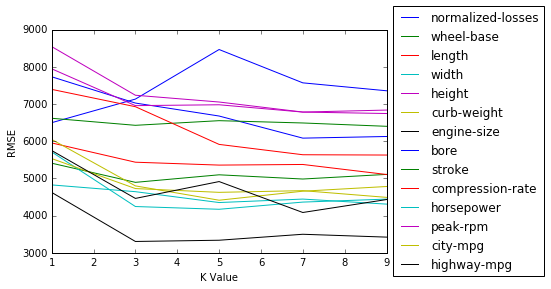

In [51]:
#plot the k values vs rmse for each column
import matplotlib.pyplot as plt
%matplotlib inline

for col in cols:
    plt.plot(cols_k_rmse[col])
    plt.xlabel('K Value')
    plt.ylabel('RMSE')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Multivariate Models

In [60]:
#update function to accept a list of train columns, but the default k value

def knn_train_test(train_col, target_col, df):
    
    #shuffle dataframe rows
    np.random.seed(42)
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    #50-50 test-train split
    halfway_row = round(len(shuffled_df)/2)
    train_df = shuffled_df[:halfway_row]
    test_df = shuffled_df[halfway_row:]
    
    #intatiate, fit, and train model
    knn = KNeighborsRegressor()
    knn.fit(train_df[train_col], train_df[target_col])
    predictions = knn.predict(test_df[train_col])
    
    #calculate and return rmse
    mse = mean_squared_error(test_df['price'], predictions)
    rmse = mse**(1/2)
    return rmse

In [61]:
#convert cols_rmse to a series and sort the values
cols_rmse = pd.Series(cols_rmse)
sorted_cols_rmse = cols_rmse.sort_values()
sorted_col_names = sorted_cols_rmse.index
sorted_col_names

Index(['engine-size', 'width', 'horsepower', 'city-mpg', 'curb-weight',
       'highway-mpg', 'wheel-base', 'length', 'compression-rate', 'stroke',
       'bore', 'peak-rpm', 'height', 'normalized-losses'],
      dtype='object')

In [62]:
#generate multivariate models, pick columns with lowest rmse
multi_rmse = {}
for num_cols in range(2,7):
    multi_rmse['{} columns'.format(num_cols)] = knn_train_test(sorted_col_names[:num_cols],
                                                              'price',
                                                              numeric_cars)
    
multi_rmse

{'2 columns': 3381.743473183003,
 '3 columns': 3166.2341354353503,
 '4 columns': 3092.478487691011,
 '5 columns': 3100.0643394153694,
 '6 columns': 2978.285813372957}

# Hyperparameter Tuning

In [63]:
#update function to accept different k values and a list of train columns

def knn_train_test(train_col, target_col, df, k):
    
    #shuffle dataframe rows
    np.random.seed(42)
    shuffled_index = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    #50-50 test-train split
    halfway_row = round(len(shuffled_df)/2)
    train_df = shuffled_df[:halfway_row]
    test_df = shuffled_df[halfway_row:]
    
    #intatiate, fit, and train model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[train_col], train_df[target_col])
    predictions = knn.predict(test_df[train_col])
    
    #calculate and return rmse
    mse = mean_squared_error(test_df['price'], predictions)
    rmse = mse**(1/2)
    return rmse

In [64]:
#use best 3 models, and vary the ka values from 1 to 25
multi_k_rmse = {}
for num_cols in range(3,6):
    train_cols = sorted_col_names[:num_cols]
    
    k_rmse = {}
    for k in range(1,26):
        rmse = knn_train_test(train_cols, 'price', numeric_cars, k)
        k_rmse[k] = rmse
    
    multi_k_rmse['{} columns'.format(num_cols)] = k_rmse
    
multi_k_rmse = pd.DataFrame(multi_k_rmse)
multi_k_rmse

,3 columns,4 columns,5 columns
1,3772.128961,3770.266682,3685.265223
2,3014.235873,3210.732439,2989.886003
3,3040.501364,3169.954063,2858.604657
4,3060.353646,3106.755332,2918.500586
5,3166.234135,3092.478488,3100.064339
6,3095.322521,2996.585366,2984.123418
7,3134.471482,3046.521966,3014.585969
8,3196.349706,3140.372813,3063.948176
9,3324.358014,3317.581331,3128.585672
10,3454.239937,3451.166761,3221.214962


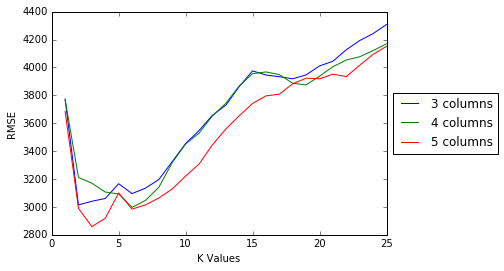

In [66]:
#plot the k values vs number of columns
%matplotlib inline
for num_cols in multi_k_rmse.columns:
    plt.plot(multi_k_rmse[num_cols])
    plt.xlabel("K Values")
    plt.ylabel("RMSE")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    